In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix
digits = load_digits()
digits.data.shape
digits.keys()
digits.data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


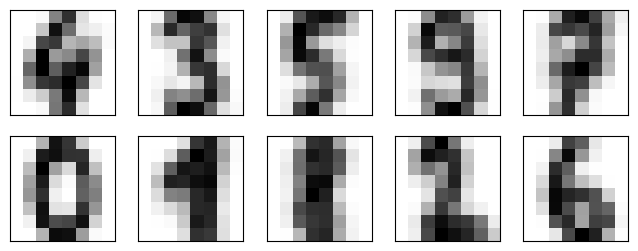

In [2]:
k_means = KMeans(n_clusters=10,random_state=0)
clusters = k_means.fit_predict(digits.data)
k_means.cluster_centers_.shape
fig, ax = plt.subplots(2, 5, figsize = (8,3))
centers = k_means.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary) 

In [4]:
labels = np.zeros_like(clusters)
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
    mask = (clusters == i)
    print(mask)
    labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True  True]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False  True  True ...  True False False]
[False False False ... False False False]
[False False False ... False False False]


Accuracy: 79.35%


Text(113.9222222222222, 0.5, 'Predicted Label')

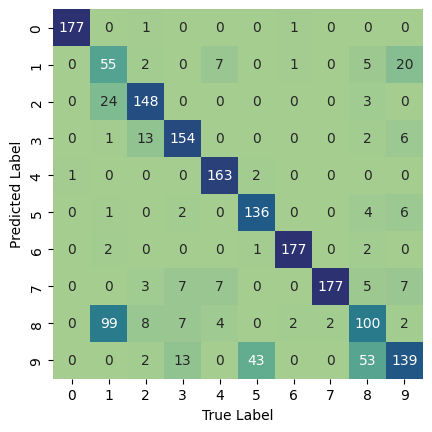

In [5]:
accuracy = "{:.2f}".format(accuracy_score(digits.target, labels)*100)
print(f"Accuracy: {accuracy}%")
matrix = confusion_matrix(digits.target, labels)
sns.heatmap(matrix.T, square = True, annot = True,
fmt = 'd', cbar=False, cmap="crest",
xticklabels=digits.target_names,
yticklabels=digits.target_names)
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
